In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

testCSV = 'https://raw.githubusercontent.com/andybbruno/DataMining/master/new_test_cleaned.csv?token=AGWKQXZ3CGK7FSO5Y7QZFTS6DCHQK'
trainCSV = 'https://raw.githubusercontent.com/andybbruno/DataMining/master/new_train_cleaned.csv?token=AGWKQXZ5YDIRGB6HOYWHTPC6DCHQQ'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


################## RANDOM FOREST ##################
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12829
           1       0.81      0.22      0.35      1768

    accuracy                           0.90     14597
   macro avg       0.85      0.61      0.65     14597
weighted avg       0.89      0.90      0.87     14597

Transmission 0.0027769193708614783
WheelDrive 0.0031973638138720114
Nationality 0.006507858889569583
PurchYear 0.0067803938495267875
NumDoors 0.0071218331411203786
4X4 0.007575076410135939
SubModel 0.014224784081195983
Make 0.018309417444214993
VehYear 0.01845597780058549
Auction 0.018874279916552637
NumCylinders 0.018887353775275274
VehicleAge 0.019560539169804752
PurchWeekDay 0.022670542040730362
Color 0.03350820524048909
PurchMonth 0.03442954247852993
Trim 0.03693423641360079
VNST 0.03732882306065979
Model 0.04022916214608658
WarrantyCost 0.04482079754054533
PurchDay 0.04537862923846031
BYRNO 0.0462199661628450

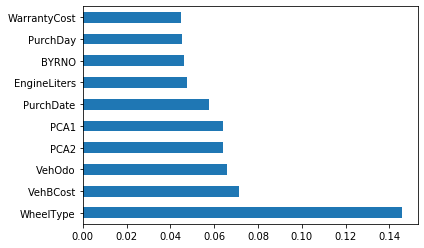

In [2]:
print("################## RANDOM FOREST ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])

# READ TEST
df = pd.read_csv(testCSV)
ids = pd.DataFrame(df['RefId'])
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(10).plot(kind='barh')

In [3]:
print(len(pd.read_csv(testCSV)['RefId']))
ids.insert(column="IsBadBuy", value=y_pred, loc=1)
ids.to_csv("RESULTS.csv", index=False)

14597


################## RANDOM FOREST + OVERSAMPLING ##################
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12829
           1       0.78      0.22      0.35      1768

    accuracy                           0.90     14597
   macro avg       0.84      0.61      0.65     14597
weighted avg       0.89      0.90      0.87     14597

Transmission 0.0026532171534169708
WheelDrive 0.0030934946073643732
Nationality 0.006153894068378672
NumDoors 0.006170669560890244
PurchYear 0.006384539776219107
4X4 0.007742505489299123
SubModel 0.014761846563726923
Auction 0.015203668963716699
NumCylinders 0.01778443517041409
Make 0.018118712369595048
VehYear 0.02100991802993489
PurchWeekDay 0.021066026597174853
VehicleAge 0.02470369191357279
Color 0.03368829234323347
PurchMonth 0.035491615672096834
VNST 0.03598982651029983
Trim 0.03620620919465178
Model 0.040999900478517
EngineLiters 0.04633226337738913
PurchDay 0.04650119570773614
WarrantyCost 0

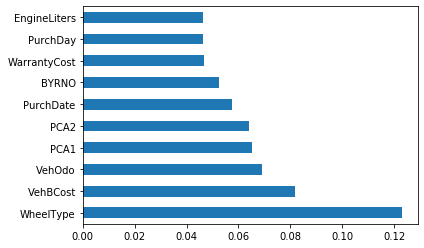

In [4]:
print("################## RANDOM FOREST + OVERSAMPLING ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)


# READ TEST
df = pd.read_csv(testCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(10).plot(kind='barh')

################## RANDOM FOREST + UNDERSAMPLING ##################
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     12829
           1       0.24      0.54      0.33      1768

    accuracy                           0.74     14597
   macro avg       0.58      0.65      0.58     14597
weighted avg       0.84      0.74      0.78     14597

Transmission 0.0025372065054734935
WheelDrive 0.0037734607605606728
NumDoors 0.006723155013809633
Nationality 0.006848969010785008
PurchYear 0.0068644903592190295
4X4 0.008486692234061472
Auction 0.014825810330207228
SubModel 0.016128535156911303
NumCylinders 0.019005568621237326
Make 0.020124321924295696
PurchWeekDay 0.02111232425953227
VehYear 0.02356055228176916
VehicleAge 0.02426493454789953
Color 0.0328938345920522
PurchMonth 0.035523751442144896
VNST 0.035791665997409704
Trim 0.03779267481436528
Model 0.04275400026184509
PurchDay 0.04574093473150035
EngineLiters 0.04660780449891597
WarrantyCo

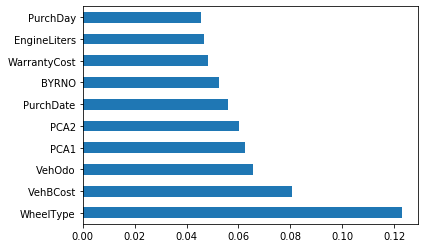

In [5]:
print("################## RANDOM FOREST + UNDERSAMPLING ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])
X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)


# READ TEST
df = pd.read_csv(testCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(10).plot(kind='barh')